In [1]:
import numpy as np
from scipy.signal import hilbert, periodogram
import matplotlib.pyplot as plt

In [2]:
dt = 1e-3
fs = 1/dt
T = 1
t = np.arange(0, T, dt)

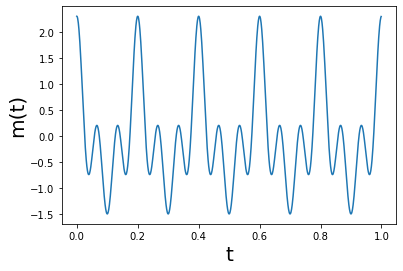

In [3]:
# Sampling frequency
fs = 1000

# Message signal
dt = 1/fs
T = 1
t = np.arange(0, T, dt)
fm = 5
m = np.cos(2*np.pi*fm*t) + 0.4*np.cos(2*np.pi*2*fm*t) + 0.9*np.cos(2*np.pi*3*fm*t)
plt.xlabel('t', fontsize=20)
plt.ylabel('m(t)', fontsize=20)

# Plot the figure
_ = plt.plot(t, m)

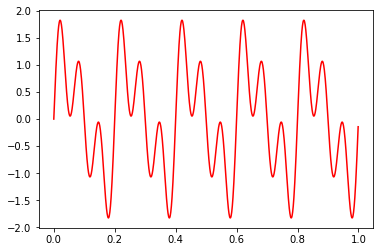

In [4]:
# Hibert transform of message signal
m_hilbert = np.imag(hilbert(m))
_ = plt.plot(t, m_hilbert, 'r')

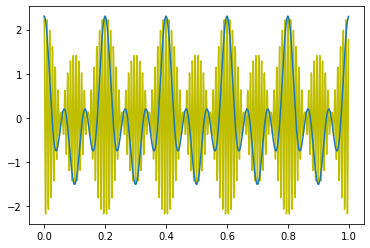

In [5]:
# upper-sideband signal with message signal
fc = 100
x_u = m*np.cos(2*np.pi*fc*t) - m_hilbert*np.sin(2*np.pi*fc*t)
_ = plt.plot(t, x_u, 'y')
_ = plt.plot(t, m)

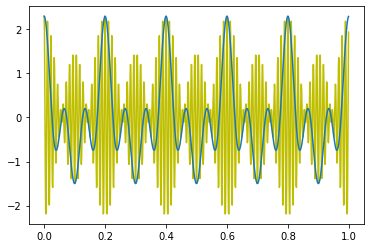

In [6]:
x_l = 0.5*2*m*np.cos(2*np.pi*fc*t) + 0.5*2*m_hilbert*np.sin(2*np.pi*fc*t)
_ = plt.plot(t, x_l, 'y')
_ = plt.plot(t, m)

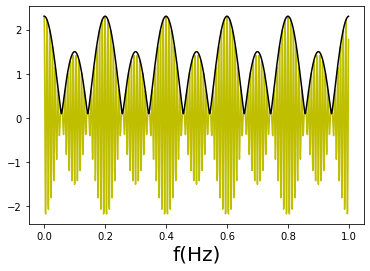

In [7]:
# envelope of SSB signal with upper-sideband SSB:
R = np.sqrt(m**2 + m_hilbert**2)
plt.xlabel('f(Hz)', fontsize=20)
_ = plt.plot(t, x_u, 'y')
_ = plt.plot(t, R, 'k')

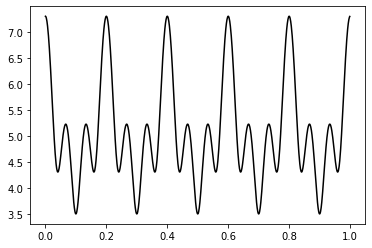

In [8]:
# demodulated output
K = 5
y = np.sqrt((m+K)**2 + m_hilbert**2)
_ = plt.plot(t, y, 'k')

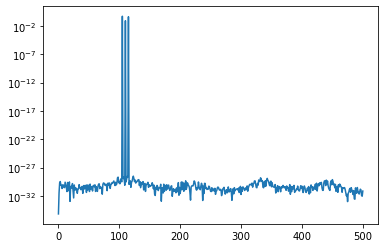

In [9]:
# power spectrum of USB signal
f, Pxx_den = periodogram(x_u, fs, scaling='spectrum')
_ = plt.semilogy(f, Pxx_den)

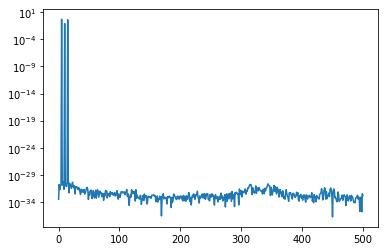

In [10]:
f1, Pxx_den1 = periodogram(m, fs, scaling='density')
_ = plt.semilogy(f1, Pxx_den1)